In [2]:
# import libraries
from gnews import GNews
import matplotlib.pyplot as plt
import networkx as nx

%matplotlib inline
google_news = GNews()

In [3]:
import networkx as nx
import matplotlib.pyplot as plt


In [4]:
# This library will be used to parse the JSON data returned by the API.
import json
# This library will be used to fetch the API.
import urllib.request

# Use login credentials
apikey = "ef95d1b340a5263d00b27c233b344128"
category = "general"
# Create the query
url = f"https://gnews.io/api/v4/top-headlines?category={category}&lang=en&country=us&max=20&apikey={apikey}"


In [5]:
# Initialize graph
g = nx.Graph()

# Collect data and build the graph
with urllib.request.urlopen(url) as response:
    data = json.loads(response.read().decode("utf-8"))
    articles = data["articles"]

    # Add nodes and edges to the graph
    for article in articles:
        source_name = article['source']['name']
        article_title = article['title']
        g.add_node(source_name, type='source')
        g.add_node(article_title, type='article')
        g.add_edge(source_name, article_title)

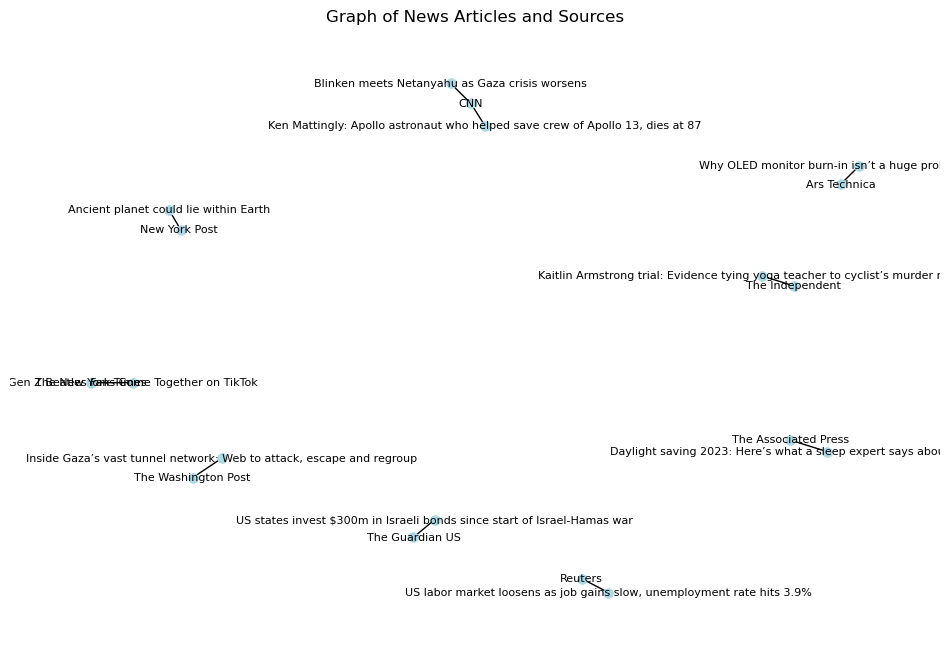

Identified Important Nodes:
('CNN', 2)
('Reuters', 1)
('US labor market loosens as job gains slow, unemployment rate hits 3.9%', 1)


In [6]:
# Now that the graph is built, we can analyze it to find important nodes
# Define importance: Nodes with the highest degree are considered important
important_nodes = sorted(g.degree, key=lambda x: x[1], reverse=True)[:3]

# Plotting the graph
plt.figure(figsize=(12, 8))
ax = plt.gca()
nx.draw(g, with_labels=True, node_size=50, node_color="lightblue", linewidths=0.5, font_size=8, ax=ax)
plt.title("Graph of News Articles and Sources")
plt.show()

# Analysis for the Medium post
print("Identified Important Nodes:")
for node in important_nodes:
    print(node)

In [7]:
print(important_nodes)

[('CNN', 2), ('Reuters', 1), ('US labor market loosens as job gains slow, unemployment rate hits 3.9%', 1)]


In [8]:
# CNN has the most important nodes 